In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Data Acquisition and Understand the data 

In [3]:
df = pd.read_csv("/kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv")

In [4]:
df.shape

(1340, 11)

In [5]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [6]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [8]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

# 2) Prepare and Clean the dataset

In [9]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df['age'].fillna(value = df['age'].mean(),inplace=True)

In [11]:
df['age'].isnull().sum()

0

In [12]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [13]:
df_new = df.dropna()

In [14]:
df_new.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [15]:
df_new.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [16]:
# Dropping unwanted columns which does not add value during model building
df_new.drop(columns = ['index','PatientID'],axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_new.shape

(1337, 9)

# 3) EDA (Exploratory Data Analysis)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='claim', ylabel='Density'>

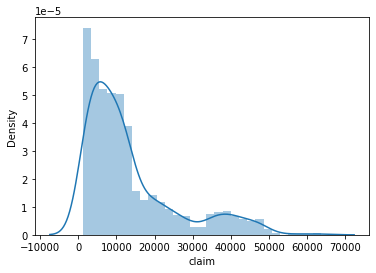

In [18]:
sns.distplot(df_new['claim']) 

In [19]:
# Graph shows Data is not normally distributed and tends as right sckrew 
# To make data normal distributed we have to check outlier present and need to remove outlier as linear regression perform less with outlier

## 1) Bivariate Analysis

<Figure size 216x216 with 0 Axes>

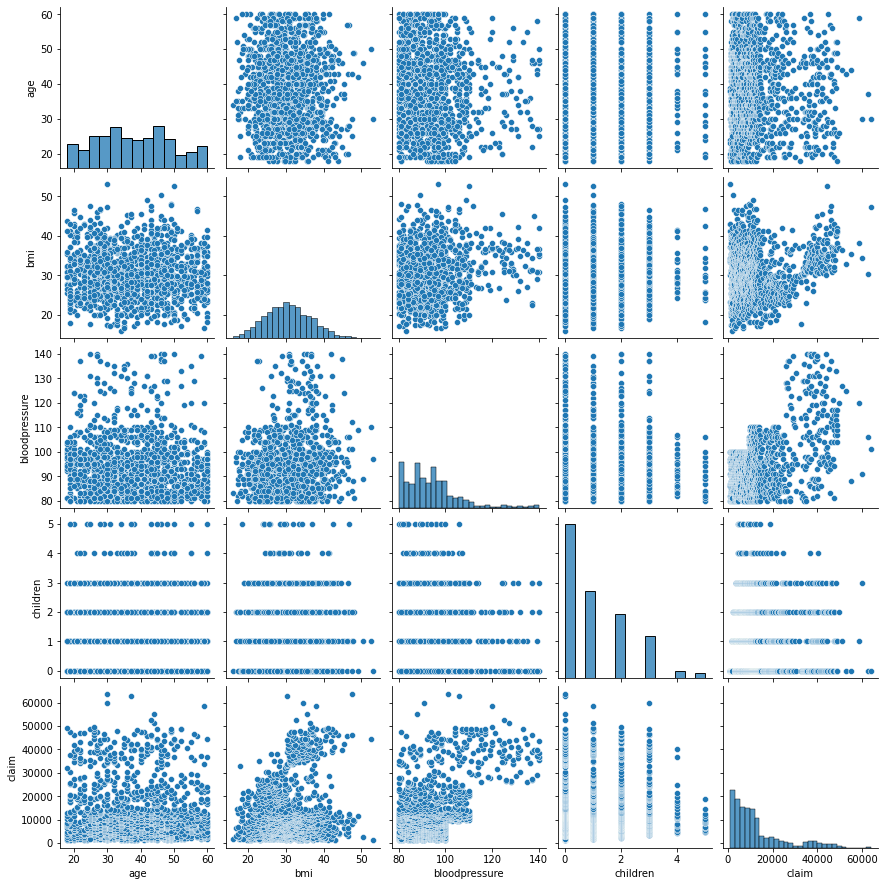

In [20]:
# Let's check bivariate Analysis -Pairplot
plt.figure(figsize = (3,3))
sns.pairplot(df_new)

<AxesSubplot:>

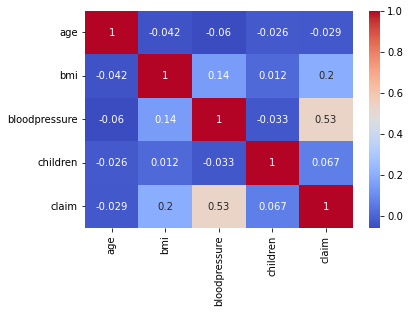

In [21]:
sns.heatmap(df_new.corr(),annot=True,cmap = 'coolwarm')

In [22]:
# as per corelation map Blood pressure and claim is 0.53 co related
# We have already dropped 'id' and 'index' column as it will not add any value during model building
# column 'BMI' also positively co-related

In [23]:
# Let's do Univariate analysis with claim and all Features of Insurance dataset
df_new.columns

Index(['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim'],
      dtype='object')

## 2) Univariate Analysis

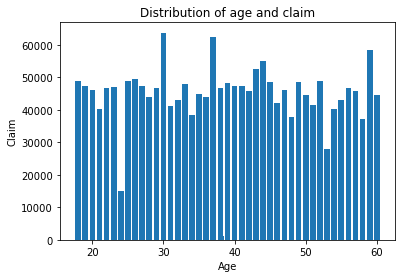

In [24]:
# Distributon of Age with respect to claim
plt.bar(df_new['age'], height = df_new['claim'],width = 0.8,align = 'center')
plt.title('Distribution of age and claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()

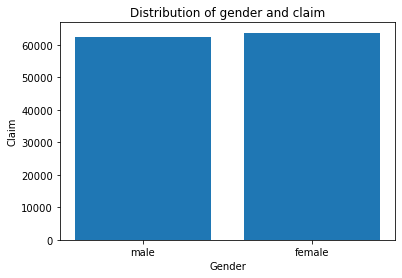

In [25]:
# Distributon of Gender with respect to claim
plt.bar(x= df_new['gender'], height = df_new['claim'])
plt.title('Distribution of gender and claim')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()

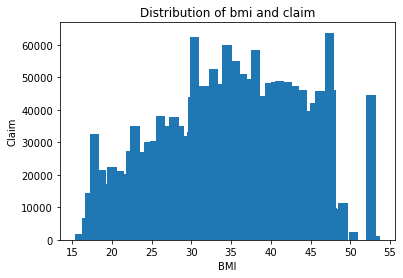

In [26]:
# Distributon of BMI with respect to claim
plt.bar(df_new['bmi'], height = df_new['claim'],width = 1.2)
plt.title('Distribution of bmi and claim')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

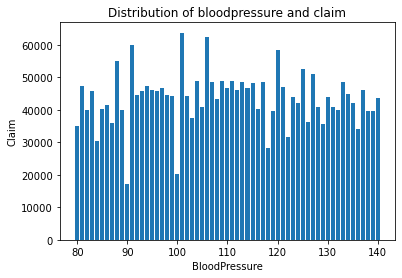

In [27]:
# Distributon of Bloodpressure with respect to claim
plt.bar(x = df_new['bloodpressure'],height=df_new['claim'],width = 0.8, align = 'center')
plt.title('Distribution of bloodpressure and claim')
plt.xlabel('BloodPressure')
plt.ylabel('Claim')
plt.show()

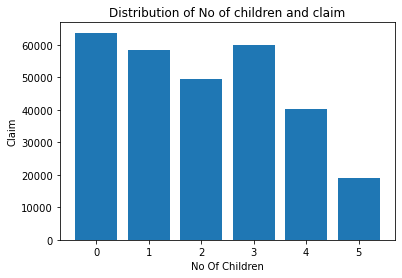

In [28]:
# Distributon of Number of children with respect to claim
plt.bar(df_new['children'], height = df_new['claim'],width = 0.8)
plt.title('Distribution of No of children and claim')
plt.xlabel('No Of Children')
plt.ylabel('Claim')
plt.show()

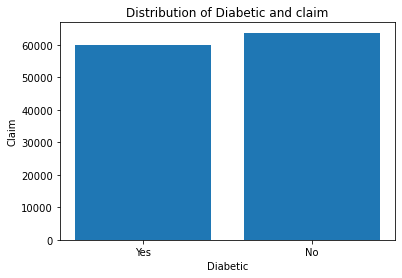

In [29]:
# Distributon of Patient Diabitic condition with respect to claim
plt.bar(df_new['diabetic'], height = df_new['claim'],width = 0.8,align = 'center')
plt.title('Distribution of Diabetic and claim')
plt.xlabel('Diabetic')
plt.ylabel('Claim')
plt.show()

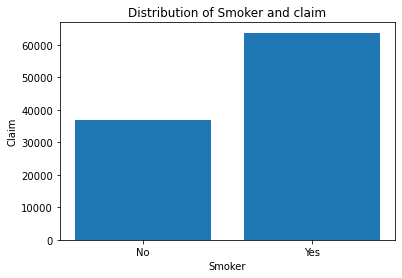

In [30]:
# Distributon of Smoker Category with respect to claim
plt.bar(df_new['smoker'], height = df_new['claim'],width = 0.8,align = 'center')
plt.title('Distribution of Smoker and claim')
plt.xlabel('Smoker')
plt.ylabel('Claim')
plt.show()

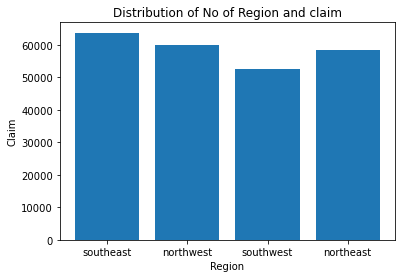

In [31]:
# Distributon of Region with respect to claim
plt.bar(df_new['region'], height = df_new['claim'],width = 0.8,align = 'center')
plt.title('Distribution of No of Region and claim')
plt.xlabel('Region')
plt.ylabel('Claim')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='claim'>

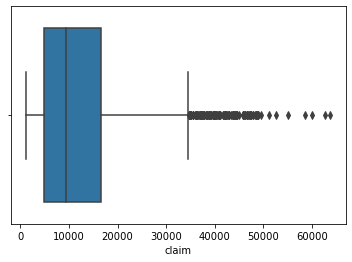

In [32]:
sns.boxplot(df_new['claim'])

In [33]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (IQR*1.5)
    upper_range = Q1 + (IQR*1.5)
    return lower_range,upper_range

In [34]:
l,u = outlier_treatment(df_new['claim'])

In [35]:
l

-13120.73

In [36]:
u

22613.41

In [37]:
df_new.drop((df[(df['claim'] > u) | (df['claim'] < l)]).index,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
cat_col = df_new.select_dtypes(exclude = ['int', 'float'])

In [39]:
cat_col.head()

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['gender'] = le.fit_transform(df_new['gender'])
df_new['diabetic'] = le.fit_transform(df_new['diabetic'])
df_new['smoker'] = le.fit_transform(df_new['smoker'])
df_new['region'] = le.fit_transform(df_new['region'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [41]:
df_new

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,1,23.2,91,1,0,0,2,1121.87
1,24.000000,1,30.1,87,0,0,0,2,1131.51
2,38.078652,1,33.3,82,1,0,0,2,1135.94
3,38.078652,1,33.7,80,0,0,0,1,1136.40
4,38.078652,1,34.1,100,0,0,0,1,1137.01
...,...,...,...,...,...,...,...,...,...
1105,45.000000,0,24.2,103,0,2,0,0,22395.74
1106,40.000000,1,20.0,110,1,0,1,0,22412.65
1107,32.000000,1,29.9,85,1,1,1,0,22462.04
1108,49.000000,0,26.7,88,0,2,1,3,22478.60


In [42]:
X = df_new.iloc[:,0:8].values
y = df_new['claim'].values

# 4) Train and Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(830, 8)
(277, 8)
(830,)
(277,)


## Features scaled down by Min Max scaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

# 5 ) Build the Linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)
y_preds = model.predict(X_test_scaled)

# 6) Accuracy Metrics ( R2 and RMSE)

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
Score = r2_score(y_test,y_preds)
Score

0.41828249314285815

In [47]:
rmse = np.sqrt(mean_squared_error(y_test,y_preds))
rmse

3753.607222419914

In [48]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=20)
model_RFR.fit(X_train_scaled, y_train)
y_pred = model_RFR.predict(X_test_scaled)

In [49]:
Score1 = r2_score(y_test,y_pred)
Score1

0.37068351450746695

In [50]:
rmse1 = np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

3904.157354611966

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

In [52]:
dt_rmse

5217.916080819293

In [53]:
dt_r2

-0.12410961414301713

Text(0, 0.5, 'y_preds')

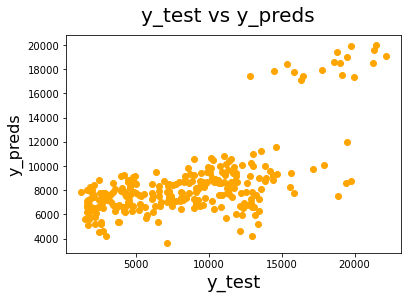

In [54]:
#VISUALIZE THE LINEAR REGRESSION MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_preds, c = 'orange')
fig.suptitle('y_test vs y_preds', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_preds', fontsize=16)  


# 7 ) Final Conclusion

In [55]:
# Conclusion 
# 1) Linear regression perform well with R2 score of 41.82% and Root mean squared is 3753 compared to Random Forest and Decision Tree Regressor
# 2) We need not face Multicolinearity problem in this dataset as features are independent to each other
# 3) Random Forest and Decision tree are not perform well as compaed to Linear Regression model

In [56]:
# Thanks for reading the Notebook Kindly do Upvote if you like my Analysis and Do comment if any improvemnt needed !! Comments are Welcomed !!